In [1]:
# pip install psycopg2 sqlalchemy

In [2]:
# dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine
%matplotlib notebook



In [3]:
# Path to sqlite


# Create an engine that can talk to the database
dbname='SQL_HW_7'
servername='localhost'
username = ''
password = ''
port=5432
conn_string = f'postgres://{username}:{password}@{servername}:{port}/{dbname}'
engine = create_engine( conn_string , echo = False)


#connection
conn = engine.connect()

In [4]:
#salaries table query
salary_ranges = pd.read_sql("SELECT * FROM salaries", conn)
salary_ranges.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [5]:
#titles table query
title_names = pd.read_sql("select * from titles", conn)
title_names.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [6]:
#employees table query
employees = pd.read_sql("select * from employees", conn)
employees.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [7]:
#merged employees and salary query
emp_sal_merged = pd.merge(employees, salary_ranges, on = "emp_no", how = "left" )
emp_sal_merged.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000


In [8]:
#titles merged with emp_sal_merged
emp_title_merged = pd.merge(emp_sal_merged, title_names, left_on = "emp_title_id", right_on = "title_id", how = "left" )
emp_title_merged

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary,title_id,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000,s0001,Staff
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422,e0002,Engineer
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973,e0002,Engineer
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000,s0001,Staff
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000,e0003,Senior Engineer
...,...,...,...,...,...,...,...,...,...,...
300019,464231,s0001,1958-08-14,Constantino,Eastman,M,1988-10-28,69696,s0001,Staff
300020,255832,e0002,1955-05-08,Yuping,Dayang,F,1995-02-26,75355,e0002,Engineer
300021,76671,s0001,1959-06-09,Ortrud,Plessier,M,1988-02-24,61886,s0001,Staff
300022,264920,s0001,1959-09-22,Percy,Samarati,F,1994-09-08,62772,s0001,Staff


In [9]:
#grouping by title and salaries
sal_title_group = emp_title_merged.groupby(['title']).mean()
sal_title_group_clean = sal_title_group.drop(columns='emp_no')
sal_title_group_clean = sal_title_group_clean.reset_index()
sal_title_group_clean

,title,salary
0,Assistant Engineer,48564.434447
1,Engineer,48535.336511
2,Manager,51531.041667
3,Senior Engineer,48506.799871
4,Senior Staff,58550.172704
5,Staff,58465.382850
6,Technique Leader,48582.896092


## Histogram

* Create a histogram to visualize the most common salary ranges for employees.

<IPython.core.display.Javascript object>


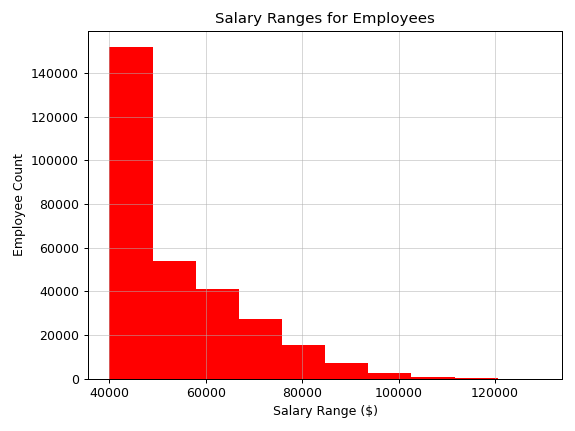

In [12]:
# x_axis = sal_title_group_clean['salary']
# y_axis = 

plt.hist(emp_title_merged['salary'], color="red" )

plt.title('Salary Ranges for Employees')
plt.xlabel('Salary Range ($)')
plt.ylabel('Employee Count')

plt.grid(alpha=0.5)
plt.show()
plt.tight_layout()

## Bar Chart

* Create a bar chart of average salary by title. 

<IPython.core.display.Javascript object>


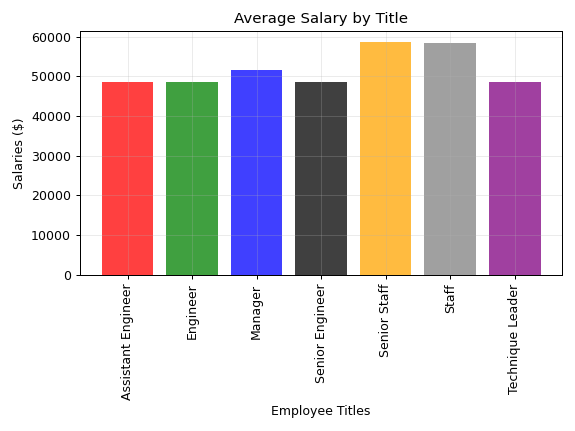

In [13]:
x_axis = sal_title_group_clean['title']
y_axis = sal_title_group_clean['salary']

plt.bar(x_axis, y_axis, align = 'center', alpha=0.75, color = ['red','green','blue', 'black', 'orange', 'grey', 'purple'])
plt.xticks(rotation = 'vertical')

plt.title("Average Salary by Title")
plt.xlabel("Employee Titles")
plt.ylabel("Salaries ($)")

plt.grid(alpha=0.25)
plt.show()
plt.tight_layout()

plt.savefig()